<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Qiskit Exploration: Ordering
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022
University of Illinois Board of Trustees. All Rights Reserved.

# imports

In [1]:
import qiskit
import numpy
import pandas

## conveniences

In [2]:
def find_backend(verbose=False):
    backends={}
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = numpy.inf

        if qubit_count>=2:
            backends[backend.name()]=backend.status().pending_jobs
            if verbose:
                print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    backends_series=pandas.Series(backends)
    return backends_series.idxmin()

DEFAULT_BACKEND="ibmq_qasm_simulator"

# main

Bit ordering is reversed by qiskit; the bit sequence (1,1,0) is converted to (0,1,1).  Informally, this corresponds to a binary expansion; (1,1,0) can be converted to
$$ 1\cdot 2^0 + 1\cdot 2^1 + 0\cdot 2^2 = 3$$
Let's understand this in a 2-qubit case, flipping the 0-th bit and then the first bit.

In [3]:
tokenfile="../token.txt"
qiskit.IBMQ.save_account(open(tokenfile, "r").read())
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider("ibm-q")

configrc.store_credentials:WARNING:2022-05-19 11:36:12,229: Credentials already present. Set overwrite=True to overwrite.


## change 0-th bit

In [4]:
circuit = qiskit.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

In [5]:
#bestbackend=find_backend(verbose=True)
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


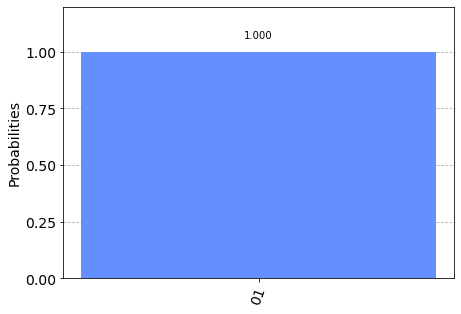

In [6]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## change 1-st bit

In [7]:
circuit = qiskit.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits
circuit.x(1)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

In [8]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


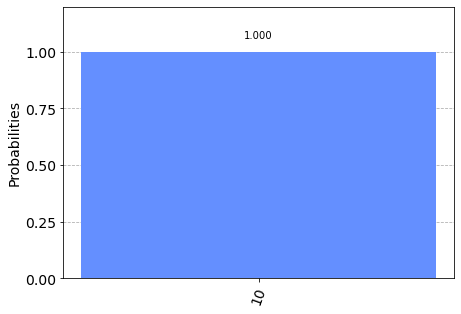

In [9]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])